In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import genfromtxt,log10,exp,inf
from scipy.optimize import curve_fit  

In [15]:
def exp(x,a,b):
    return a*10**(b*x)

In [16]:
data512 = genfromtxt("time_results_hDDD_3iso_512MPc.dat",delimiter=",")
data1 = genfromtxt("time_results_hDDD_3iso_1GPc.dat", delimiter=",")
dmax512 = data512[:,1]
time512 = data512[:,2]
dmax1 = data1[:,1]
time1 = data1[:,2]

In [18]:
pars512, cov = curve_fit(f=exp, xdata=dmax512, ydata=time512, p0=[0, 0], bounds=(-inf, inf))
pars1, cov = curve_fit(f=exp, xdata=dmax1, ydata=time1, p0=[0, 0], bounds=(-inf, inf))
x_fit_512 = dmax512
x_fit_1 = dmax1
y_fit_512 = exp(dmax512,*pars512)
y_fit_1 = exp(dmax1,*pars1)
a512,b512 = pars512[0], pars512[1]
a1,b1 = pars1[0], pars1[1]

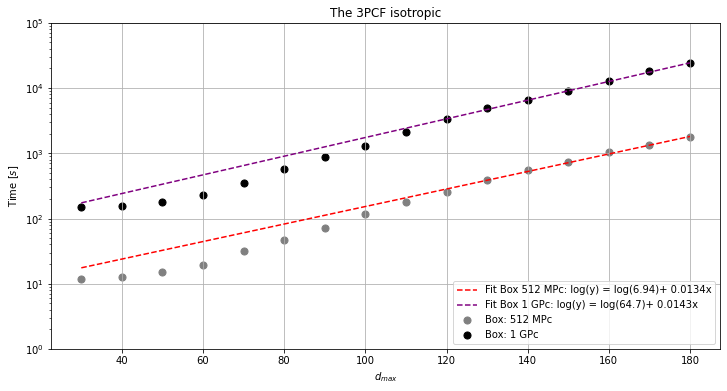

In [22]:
plt.figure(figsize=(12,6))
#plt.plot(puntos,tiempo,color = "black",
#linestyle="-",marker = 'o', markerfacecolor = "blue",markersize = 8)
plt.grid()
plt.scatter(dmax512, time512, marker = "o", s=50,c="gray" ,label = "Box: 512 MPc")
plt.scatter(dmax1, time1, marker = "o", s=50,c="black", label = "Box: 1 GPc")
plt.plot(x_fit_512,y_fit_512, linestyle="--", color="red", label=f"Fit Box 512 MPc: log(y) = log({round(a512,2)})+ {round(b512,4)}x")
plt.plot(x_fit_1,y_fit_1, linestyle="--", color="purple", label=f"Fit Box 1 GPc: log(y) = log({round(a1,2)})+ {round(b1,4)}x")
#plt.grid()
plt.yscale("log")
plt.xscale("linear")
plt.ylim([10**(0),10**(5)])
plt.ylabel(r"Time [$s$]")
plt.xlabel(r"$d_{max}$")
plt.legend(loc="lower right")
plt.title("The 3PCF isotropic")
plt.savefig("3PCFiso_both.png")
plt.show()

In [12]:
print((100.4*10**((1.27e-4)*100000)))

503191982561780.6
